In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
%cd

C:\Users\Amps


In [40]:
titanic_df = pd.read_csv('Desktop/Study/Multicampus/ML/0722/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic_df.shape

(891, 12)

In [42]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 데이터 전처리 : 결측치 처리

In [45]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

#모든 컬럼의 Null값을 합산해서 Null 값이 있는지 확인
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
#문자열 변수 빈도 분포 확인
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
C87              1
E49              1
A31              1
B42              1
E12              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [47]:
#문자열 변수 Cabin값 변경
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

#선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포

In [48]:
#생존 데이터 확인
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
#성별 분포 확인
print(titanic_df.groupby('Sex')['Sex'].count())

#생존 분포 확인
print(titanic_df.groupby('Survived')['Survived'].count())

Sex
female    314
male      577
Name: Sex, dtype: int64
Survived
0    549
1    342
Name: Survived, dtype: int64


In [50]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

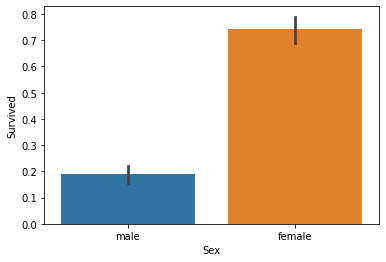

In [51]:
#성별 생존자(막대그래프)
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

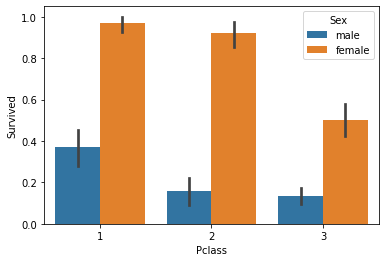

In [52]:
#객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=titanic_df)

## 데이터 전처리 : 구간화

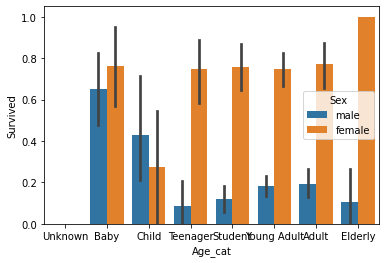

In [53]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
        
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

## 데이터 전처리 : 인코딩

In [57]:
from sklearn import preprocessing

#레이블 인코딩 함수
def encode_features(dataDF):
    #문자열 카테고리 피처
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


# 데이터 전처리 : 삭제

In [58]:
#불필요한 변수 제거 drop()
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [115]:
# 지금까지 가공한 내용을 정리하고 함수로 작성(재사용 가능)
from sklearn.preprocessing import LabelEncoder

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] #첫문자만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 모델링

## 1단계 : 데이터 로딩

In [116]:
titanic_df = pd.read_csv('Desktop/Study/Multicampus/ML/0722/train.csv')

#정답 레이블
y_titanic_df = titanic_df['Survived']

#학습 데이터 세트
#결정값으로 사용할 Survived 컬럼 제외
X_titanic_df = titanic_df.drop('Survived', axis=1)

## 2단계 : 데이터 전처리

In [117]:
#데이터 전처리 함수 호출
X_titanic_df = transform_features(X_titanic_df)

## 3단계 : 데이터셋 분리

In [118]:
#학습/테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## 4단계 : 분류 알고리즘을 적용한 학습/예측/평가

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=4)
rf_clf = RandomForestClassifier(random_state=4)
lr_clf = LogisticRegression()

#결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트의 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀의 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리의 정확도 : 0.7821
랜덤포레스트의 정확도 : 0.8492
로지스틱회귀의 정확도 : 0.8492


C:\Users\Amps\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 5단계 : 교차 검증을 통한 모델 성능 향상
결정트리 모델 성능 향상

In [104]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_validate, GridSearchCV

#결정트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    score = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test, = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test, = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        score.append(accuracy)
        print('교차검증 %d : %f' % (iter_n, accuracy))
        
    mean_accuracy = np.mean(score)
    print('평균 정확도 : %f' % mean_accuracy)

exec_kfold(dt_clf, folds=5)

교차검증 0 : 0.770950
교차검증 1 : 0.758427
교차검증 2 : 0.792135
교차검증 3 : 0.780899
교차검증 4 : 0.814607
평균 정확도 : 0.783403


In [95]:
#참고 : 피쳐 데이터 세트 확인
X_titanic_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [96]:
#참고 : index 값 출력
X_titanic_df.values[0]

array([ 3.  ,  1.  , 22.  ,  1.  ,  0.  ,  7.25,  7.  ,  3.  ])

In [102]:
#참고 : train_index, test_index 확인

kfold = KFold(n_splits=5)
for train_index, test_index in kfold.split(X_titanic_df):
#     print(train_index, test_index)
    pass

In [113]:
#cross_val_score()를 이용한 교차 검증 수행
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차검증 {0}, 정확도 : {1:.4f}'.format(iter_n, accuracy))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차검증 0, 정확도 : 0.7542
교차검증 1, 정확도 : 0.7809
교차검증 2, 정확도 : 0.7978
교차검증 3, 정확도 : 0.7809
교차검증 4, 정확도 : 0.8371
평균 정확도 : 0.7902


## 6단계 : 하이퍼파라미터 튜닝

In [114]:
#GridSearchCV 클래스를 이용해 하이퍼 파라미터를 튜닝

#DecisionTreeClassifier의 최적 하이퍼파라미터를 찾고 예측 성능 측정
#CV : 5개의 폴드 세트 지정
#하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf

#하이퍼 파라미터 설정
parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]
             }

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuacy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuacy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
